# Table of contents
1. [Introduction](#introduction)
    1. [Documentation](#documentation)
2. [Magics](#magics)
    1. [Magics Introduction](#magics)
    2. [Profiling](#profiling)
    3. [Combining Different Languages](#combining_languages)
3. [Widgets](#paragraph2)
4. [Additional Resources](#additional_resources)

# Introduction <a name="introduction"></a>

Jupyter notebooks were born from the IPython project. The name "Jupyter" comes from combining three languages: Julia, Python, and R, however Jupyter notebooks support a variety of different programming languages.

## Documentation <a name="documentation"></a>
Jupyter notebooks are an easy and effective method of documenting your process and findings.

The language used for documentation within Jupyter notebooks is markdown. Within markdown you can include mathematical expressions within your code using the following syntax `$$ <mathematical expression> $$`

$$ a^2 + b^2 = c^2 $$
$$ \sum_{i=1}^n (1+r)^{-i} $$
$$ \int_0^\infty \mathrm{e}^{-x}\,\mathrm{d}x $$

Embedding HTML, images, or videos is easy.

In [1]:
from IPython.display import display, YouTubeVideo, HTML, Image

In [2]:
Image(url="http://www.analyticshero.com/wp-content/uploads/2012/10/trust_data.jpg")

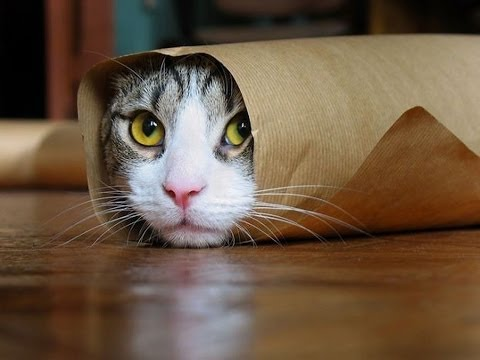

In [3]:
YouTubeVideo('tntOCGkgt98')

In [4]:
display(HTML('<h1>Hello, world!</h1>'))

# Magic Functions <a name="magics"></a>
### One of the highlights of jupyter notebooks are magic functions. You can view all magic functions and helpful documentation with 
```python
%magic
```

In [5]:
%magic

You can run shell commands and capture the output using `!`

In [6]:
!ls

Jupyter Notebook Tutorial.ipynb
Jupyter Notebook Workflow.ipynb
README.md
data
dt.dot
dt.png
requirements.txt


In [7]:
!conda info --envs 

# conda environments:
#
py27                     C:\Users\n157179\AppData\Local\Continuum\Anaconda3\envs\py27
tensorflow            *  C:\Users\n157179\AppData\Local\Continuum\Anaconda3\envs\tensorflow
root                     C:\Users\n157179\AppData\Local\Continuum\Anaconda3



In [8]:
x = 10

In [9]:
%who_ls

['HTML', 'Image', 'YouTubeVideo', 'display', 'x']

You can use `?` for help on any function, for information on any variable, and help on any magic function. 

In [10]:
? x

In [11]:
?Image

# Profiling <a name="profiling"></a>
Profiling is a easy and effective way to identify bottlenecks in your code.

In [12]:
%load_ext line_profiler

In [13]:
def profile_slow(n):
    total = 0
    for i in range(n):
        total += slow_func(i)
    return total
        
def profile_fast(n):
    total = 0
    for i in range(n):
        total += fast_func(i)
    return total
    
def slow_func(x):
    number_list = range(x)
    total = sum(number_list)
    return total
    
def fast_func(x):
    return ((x+1)*x)/2

In [14]:
%timeit profile_slow(1000)

100 loops, best of 3: 7.95 ms per loop


In [15]:
%lprun -f profile_slow profile_slow(1000)

In [16]:
%timeit profile_fast(1000)

1000 loops, best of 3: 229 µs per loop


In [17]:
%lprun -f profile_fast profile_fast(1000)

# Combining different languages <a name="combining_languages"></a>

Let's try working through a simple example using a jupyter notebook.

You acquire a small life insurance company. Unfortunately, the underwriting manual they were using to accept cases was tragically lost in the acquisition. You are tasked with recreating their underwriting manual as closely as possible. The carrier only had one class, so underwriting outcomes are either **Standard** or **Decline**.

Fortunately, the company had a dataset of the last 10000 applications which were received over the past year and include information such as:
* Underwriting class
* Issue age
* Face Amount
* BMI
* Does the person have diabetes?
* Does the person have high blood pressure?

In [18]:
%matplotlib inline
import pandas as pd

In [19]:
import seaborn as sns

In [20]:
df = pd.read_csv("data/underwriting_data.csv")
df.set_index("Person ID", inplace=True)
df.head()

,Underwriting Class,Face Amount,Issue Age,BMI,Diabetes,High Blood Pressure
Person ID,,,,,,
1,Standard,495000.0,49.0,28.967711,False,False
2,Standard,375000.0,55.0,26.110713,False,False
3,Standard,234000.0,38.0,24.237394,False,False
4,Standard,477000.0,42.0,20.039574,False,False
5,Standard,776000.0,58.0,24.926617,False,False


In [21]:
df.describe()

,Face Amount,Issue Age,BMI
count,10000.000000,10000.000000,10000.000000
mean,511974.700000,39.789500,25.641679
std,192065.736623,9.923026,3.253010
min,103000.000000,18.000000,20.039574
25%,361000.000000,32.000000,23.673372
50%,502000.000000,39.000000,25.158604
75%,651000.000000,47.000000,26.901814
max,998000.000000,67.000000,44.773736


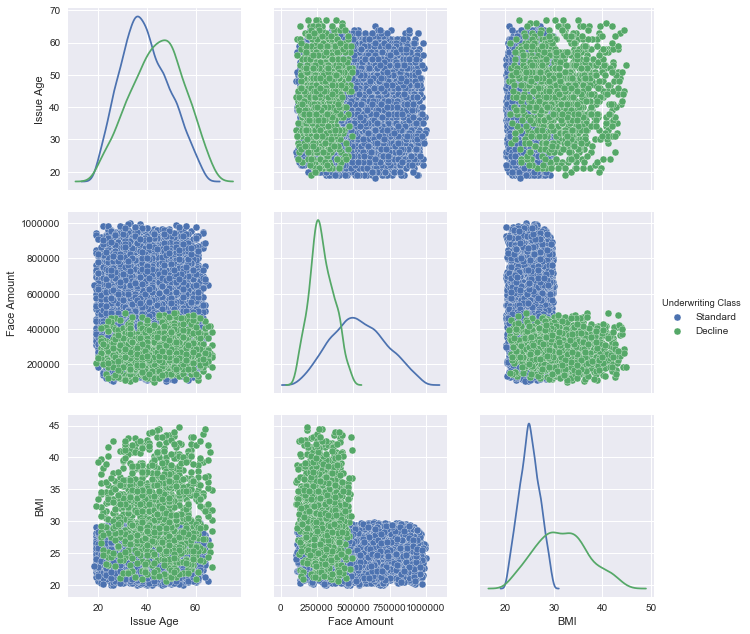

In [22]:
sns.pairplot(df[["Underwriting Class", "Issue Age", "Face Amount", "BMI"]], 
             hue="Underwriting Class", 
             diag_kind="kde", size=3)

While matplotlib has impressive plotting capabilities, some things might be more familiar to do within ggplot.

In [23]:
%load_ext rpy2.ipython

In [24]:
# We need ggplot2
%R require(ggplot2)

array([1], dtype=int32)

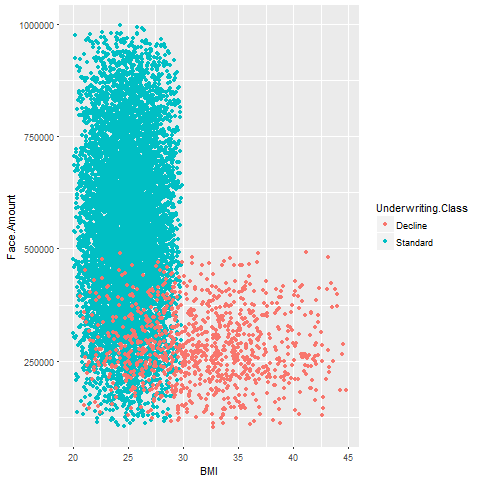

In [25]:
%%R -i df
ggplot(df, aes(BMI, Face.Amount, color=Underwriting.Class)) + geom_point()

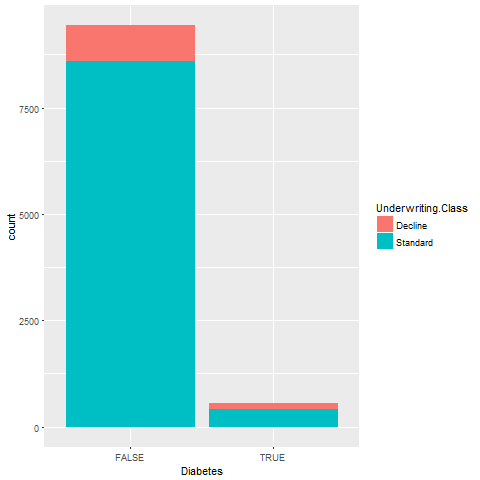

In [26]:
%%R
ggplot(df, aes(Diabetes, ..count..)) + geom_bar(aes(fill=Underwriting.Class))

In [27]:
features = ["Issue Age", "Face Amount", "BMI", "Diabetes", "High Blood Pressure"]
X = df[features]
y = df["Underwriting Class"]

In [28]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [29]:
clf = DecisionTreeClassifier(max_depth=4, min_impurity_split=.05)

In [30]:
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=0.05, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [31]:
from PIL import Image
def visualize_tree(clf, features):
    with open("dt.dot", 'w') as f:
        export_graphviz(clf, out_file=f,
                        feature_names=features)
    !dot -Tpng dt.dot -o dt.png
    im = Image.open("dt.png")
    return im

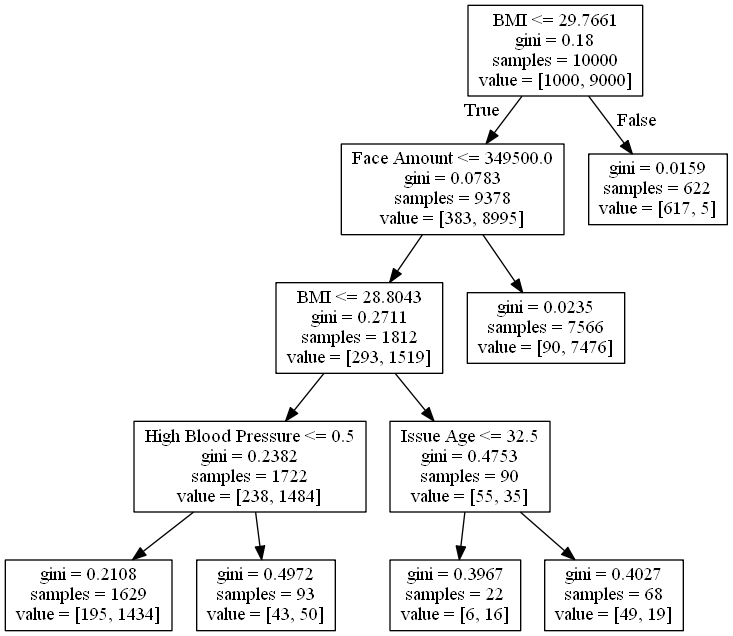

In [32]:
visualize_tree(clf, features)

We can also quickly build a GLM in R and extract predictions.

In [33]:
%%R -o glm_predictions

glmfit <- glm(Underwriting.Class ~ ., family=binomial, data=df)
r_summary <- capture.output(summary(glmfit))
glm_predictions <- predict(glmfit, df, type="response")

In [34]:
r_summary = %R r_summary
for line in r_summary[2:-1]:
    print(line)

glm(formula = Underwriting.Class ~ ., family = binomial, data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.9346   0.0239   0.0717   0.1826   2.3201  

Coefficients:
                          Estimate Std. Error z value Pr(>|z|)    
(Intercept)              1.747e+01  7.194e-01  24.276  < 2e-16 ***
Face.Amount              1.136e-05  5.131e-07  22.136  < 2e-16 ***
Issue.Age               -5.660e-02  5.658e-03 -10.004  < 2e-16 ***
BMI                     -6.245e-01  2.394e-02 -26.085  < 2e-16 ***
DiabetesTRUE            -1.148e+00  1.946e-01  -5.897  3.7e-09 ***
High.Blood.PressureTRUE -2.224e+00  1.904e-01 -11.684  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 6501.7  on 9999  degrees of freedom
Residual deviance: 2222.1  on 9994  degrees of freedom
AIC: 2234.1

Number of Fisher Scoring iterations: 8


In [35]:
glm_predictions

array([ 0.90248766,  0.90942186,  0.94464412, ...,  0.54991705,
        0.83170728,  0.21185266])

# Widgets <a name="widgets"></a>
Widgets are a great way to add interactivity to your notebooks. 

In [36]:
from ipywidgets import widgets

In [37]:
text = widgets.Text()
display(text)

def handle_submit(sender):
    print(text.value)
    
text.on_submit(handle_submit);

In [38]:
button = widgets.Button(description="Click Me!")
display(button)

def on_button_clicked(b):
    print("Button clicked.")
    
button.on_click(on_button_clicked);

In [39]:
def f(x):
    print(x)
    
widgets.interact(f, x=100);

Let's combine our widget knowledge and create some kickout rules for the dataset above.

In [40]:
diabetes_button = widgets.Checkbox(value=False, description="Kick out Diabetes?")
hbp_button = widgets.Checkbox(value=False, description="Kick out High Blood Pressure?")
bmi_slider = widgets.FloatRangeSlider(value=[20, 45], min=10, max=50, step=.1, description="Acceptable BMI Range")
issue_age_slider = widgets.IntRangeSlider(value=[18, 75], min=0, max=120, step=1.0, 
                                            description="Acceptable Issue Age Range")
face_amount_slider = widgets.FloatSlider(value=1e6, min=0, max=1e6, step=10000, readout_format="$,.0f", 
                                         description="Face Amount Threshold")

display(diabetes_button)
display(hbp_button)
display(bmi_slider)
display(issue_age_slider)
display(face_amount_slider)

stp_text = widgets.Text(description="Straight Through Pass Rate")
decline_text = widgets.Text(description="Decline Percentage")

display(stp_text)
display(decline_text)

def calc_metrics(sender):
    ix = True
    if diabetes_button.value:
        ix &= ~df["Diabetes"]
    if hbp_button.value:
        ix &= ~df["High Blood Pressure"]
    ix &= df["BMI"] >= bmi_slider.value[0]
    ix &= df["BMI"] <= bmi_slider.value[1]
    
    ix &= df["Issue Age"] >= issue_age_slider.value[0]
    ix &= df["Issue Age"] <= issue_age_slider.value[1]
    
    ix &= df["Face Amount"] <= face_amount_slider.value
        
    tmp = df[ix]
    
    stp_text.value = "{0:.0f}%".format(100*tmp.shape[0] / df.shape[0])
    decline_text.value = "{0:.0f}%".format(100*(tmp["Underwriting Class"] == "Decline").sum() / tmp.shape[0])

    
diabetes_button.observe(calc_metrics)
hbp_button.observe(calc_metrics)
bmi_slider.observe(calc_metrics)
issue_age_slider.observe(calc_metrics)
face_amount_slider.observe(calc_metrics)
calc_metrics(None);

# Additional Resources <a name="additional_resources"></a>
* https://github.com/jupyter/jupyter/wiki/A-gallery-of-interesting-Jupyter-Notebooks
* https://github.com/jupyter/jupyter/wiki/Jupyter-kernels
* https://github.com/jupyter/dashboards
* http://multithreaded.stitchfix.com/blog/2017/07/26/nodebook/
* http://blog.jupyter.org/2016/07/14/jupyter-lab-alpha/
* http://beakernotebook.com/